In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

tea_df = pd.read_csv("scraper/clean_data.csv")
tea_df.head()

,id,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl,url
0,65303,2015 Last Thoughts,White 2 Tea,16.0,89.0,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51.0,20.0,https://media.steepster.com/api/file/kL8dCqJrT...,https://steepster.com/teas/white-2-tea/65303-2...
1,43095,Golden Orchid,Whispering Pines Tea Company,155.0,89.0,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315.0,236.0,https://media.steepster.com/api/file/exT0OHWdT...,https://steepster.com/teas/whispering-pines-te...
2,78801,The Silver Moonlight,Chai & Mighty,6.0,89.0,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3.0,4.0,https://media.steepster.com/api/file/cmNMAbwSn...,https://steepster.com/teas/chai-and-mighty/788...
3,48058,Cocoa Amore,Whispering Pines Tea Company,85.0,89.0,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227.0,156.0,https://media.steepster.com/api/file/0vAf5X4Si...,https://steepster.com/teas/whispering-pines-te...
4,32444,Laoshan Bilochun Green,Verdant Tea,19.0,89.0,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11.0,21.0,https://media.steepster.com/api/file/F0AJQO5DT...,https://steepster.com/teas/verdant-tea/32444-l...


### Indexing flavors

In [3]:
flavors = set()
for tea in tea_df['flavors']:
    for flavs in tea.split(","):
        flavors.add(flavs.strip().title())

ordered_flavors = sorted(list(flavors))
number_of_flavors = len(flavors)

print("Total number of flavors:", number_of_flavors)

flavor_to_index = {}
index_to_flavor = {}
i = 0
for flavor in ordered_flavors:
    flavor_to_index[flavor] = i
    index_to_flavor[i] = flavor
    i += 1
    
print("Index of Floral:", flavor_to_index["Floral"], "\nFlavor with index 5:", index_to_flavor[4])

('Total number of flavors:', 358)
('Index of Floral:', 118, '\nFlavor with index 5:', 'Apple')


### One-hot encoding for Tea Flavors

In [4]:
number_of_teas = tea_df.shape[0]
flavor_mat = np.zeros((number_of_teas, number_of_flavors))

for row in range(number_of_teas):
    for flvr in set([flvr.strip().title() for flvr in tea_df.flavors[row].split(',')]):
        flavor_mat[row][flavor_to_index[flvr]] = 1

flavor_mat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [5]:
print("Flavors of 1st tea:", sorted([flvr.strip().title() for flvr in tea_df.flavors[0].split(',')]))

flavor_df = pd.DataFrame(data=flavor_mat, columns=index_to_flavor.values())
flavor_df.head()

('Flavors of 1st tea:', ['Apple Skins', 'Floral', 'Grapes', 'Honeysuckle', 'Lemon', 'Orchids', 'Pepper', 'Peppercorn', 'Rainforest', 'Sweet', 'Vegetal', 'Vinegar', 'Winter Honey', 'Zucchini'])


,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,Artificial,...,White Chocolate,White Grapes,White Wine,Winter Honey,Wood,Yams,Yeast,Yeasty,Yogurt,Zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One-hot encoding for Tea Types

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidfvectorizer = TfidfVectorizer( max_features = 200000, ngram_range = (1, 1))
term_document_matrix_tfidf = tfidfvectorizer.fit_transform(tea_df.teaType)

/home/bowen/.local/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [8]:
term_document_matrix_tfidf.shape

(15641, 20)

In [9]:
tfidfvectorizer.get_feature_names()

[u'black',
 u'blend',
 u'chai',
 u'erh',
 u'flowering',
 u'food',
 u'fruit',
 u'green',
 u'guayusa',
 u'herbal',
 u'honeybush',
 u'matcha',
 u'mat\xe9',
 u'oolong',
 u'pu',
 u'rooibos',
 u'tea',
 u'white',
 u'yellow',
 u'yerba']

(15641, 20)
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.368418
[t-SNE] Error after 300 iterations: 0.368418
(10000, 2)


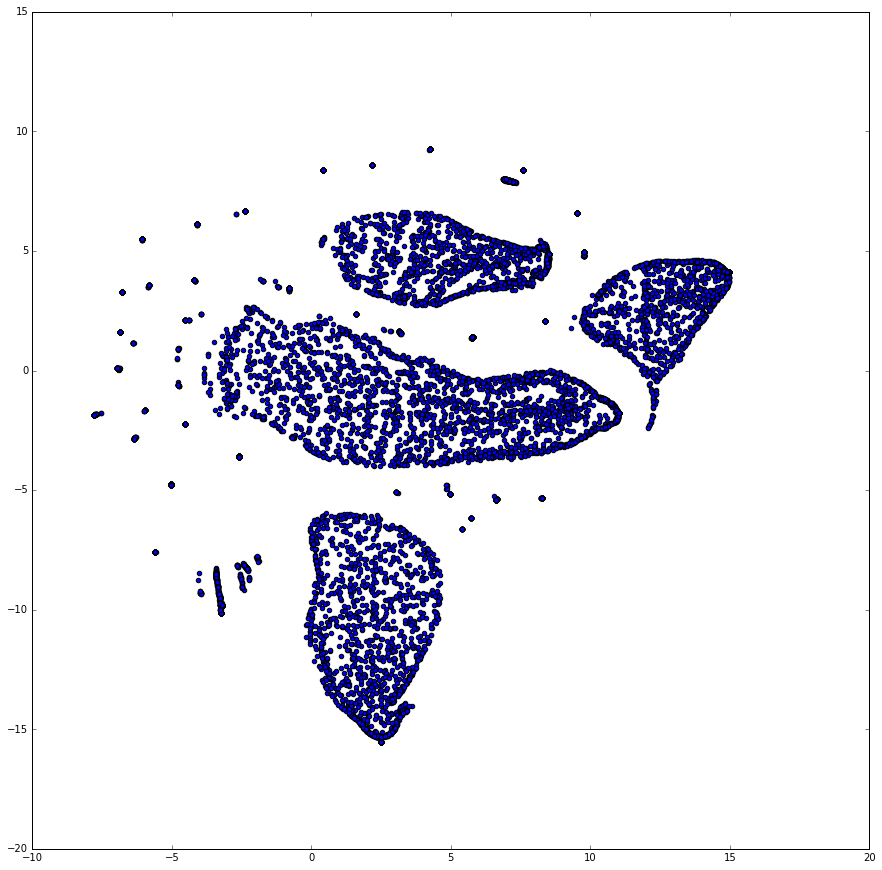

In [104]:
from sklearn.manifold import TSNE

tsne_teaType = TSNE(verbose=1)

print(term_document_matrix_tfidf.shape)
subset_teaType = term_document_matrix_tfidf[:10000, :]
projected_teaType = tsne_teaType.fit_transform(subset_teaType.toarray())
print(projected_teaType.shape)
plt.figure(figsize=(15,15))
plt.scatter(projected_teaType[:,0],projected_teaType[:,1])
plt.show()

In [11]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], 'o',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('on')
    plt.tight_layout()

In [114]:
# 2D embedding of the digits dataset
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)
clustering.fit(subset_teaType.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7fb75c833d70>)

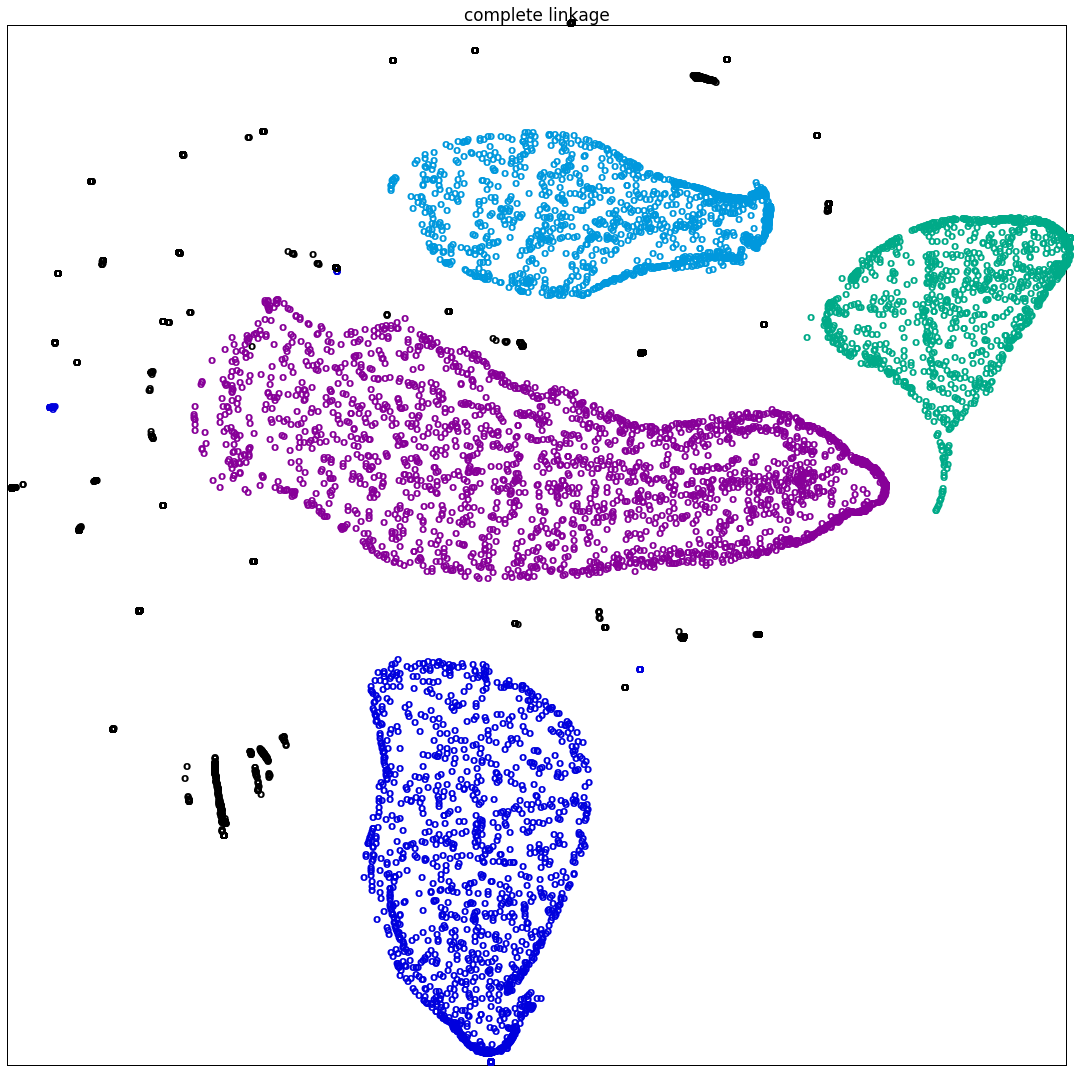

In [115]:
plot_clustering(projected_teaType, clustering.labels_, "complete linkage")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=5)
clustering.fit(term_document_matrix_tfidf.toarray())

In [118]:
tea_df.teaType = clustering.labels_

In [119]:
teaType_dummy = pd.get_dummies(tea_df.teaType)

In [120]:
teaType_count = teaType_dummy.sum(axis = 0)
print("Number of unique tea type:", teaType_count.shape[0])

('Number of unique tea type:', 5)


In [121]:
teaType_count.sort_values()[:20]

4    1842
2    2026
3    2112
1    4042
0    5619
dtype: int64

In [122]:
teaType_count.sort_values(ascending=False)[:20]

0    5619
1    4042
3    2112
2    2026
4    1842
dtype: int64

### One-hot encoding for Brands

In [12]:
brand_dummies = pd.get_dummies(tea_df.brand)

#### Many invalid inputs in "Brand"

In [13]:
brand_count = brand_dummies.sum(axis=0)
brand_count[brand_count==1]

1001Kruiden                                                     1
365 Organic                                                     1
:D                                                              1
A Tea Affair                                                    1
ABC Tea                                                         1
ABC Tea House                                                   1
AKA Dwelling                                                    1
AMANA                                                           1
ASDA                                                            1
ASI Tea company                                                 1
Aap Ki Pasand                                                   1
Adagio Custom Blends, Aun-Juli Riddle                           1
Adagio Custom Blends, Brittany Kienke                           1
Adagio Custom Blends, Cheryl Yi                                 1
Adagio Custom Blends, Elizabeth Lane                            1
Adagio Cus

### One-hot encoding for Ingredients

In [123]:
ingredients_dummy = tea_df.ingredients.str.get_dummies(sep=', ')

In [124]:
ingredients_dummy.head()

,Acerola Cherry,Agave,Aleppo Chili,Alfalfa Leaf,Allspice,Almond,Almonds,Aloe Vera,Ancho Chili,Anise,...,Wintergreen,Yabao,Yellow Tea Leaves,Yellowdock,Yerba Mate Leaves,Young Hyson Green Tea,Yunnan Black Tea,Yunnan Dian Hong,Yuzu,Zhenshan Xiaozhong Tea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
ingredients_count = ingredients_dummy.sum(axis = 0).sort_values()

print("Number of ingredients in only one tea:", ingredients_count[ingredients_count == 1].shape[0])
col_del = list(ingredients_count[ingredients_count == 1].index)

('Number of ingredients in only one tea:', 44)


In [129]:
ingredients_dummy.drop(col_del, axis=1, inplace=True)

In [131]:
ingredients_dummy.shape

(15641, 496)

### One-hot encoding for Certification

In [132]:
certification_dummy = tea_df.certification.str.get_dummies(sep=', ')

In [133]:
certification_count = certification_dummy.sum(axis = 0).sort_values()
certification_count

Kosher             272
Vegan              301
Fair Trade         426
Organic           1693
Not available    13559
dtype: int64

### One-hot encoding for Sold In and Caffeine

In [134]:
soldIn_dummy = tea_df.soldIn.str.get_dummies(sep=', ')

In [135]:
caffeine_dummy = pd.get_dummies(tea_df["caffeine"])

In [136]:
soldIn_dummy.sum(axis = 0)

Bulk             1225
Loose Leaf       7586
Not available    6637
Sachet            557
Tea Bag          1208
dtype: int64

In [137]:
caffeine_dummy.sum(axis = 0)

Caffeine Free     1386
Decaffeinated      124
High               923
Low                785
Medium            1655
Not available    10768
dtype: int64

### Features Representation

In [155]:
tea_df_dummy = pd.concat([flavor_df, teaType_dummy, ingredients_dummy,\
                          certification_dummy, soldIn_dummy, caffeine_dummy\
                          ], axis = 1)

In [156]:
tea_df_dummy.columns[-100:]

Index([u'Rose', u'Rose Blossom Leaves', u'Rose Buds', u'Rose Buds And Petals',
       u'Rose Hip Peels', u'Rose Hips', u'Rose Petals', u'Rosemary',
       u'Safflower', u'Safflower Petals', u'Safflowers', u'Saffron', u'Sage',
       u'Saigon Cinnamon', u'Sarsaparilla', u'Sea Buckthorn Berries',
       u'Sea Salt', u'Select Green Teas', u'Sencha', u'Sencha Powder',
       u'Sesame', u'Shatavari Root', u'Shou Mei White Tea',
       u'Shredded Coconut', u'Skullcap', u'Sliver Lime Flower', u'Sour Cherry',
       u'South Indian Flower Orange Pekoe Black Tea', u'Spearmint', u'Spices',
       u'Sprinkles', u'St. John's Wort', u'Star Anise Bits', u'Starfruit',
       u'Stevia Leaf', u'Stinging Nettle Leaves', u'Strawberry',
       u'Strawberry Leaves', u'Sugar', u'Sugar Crystals', u'Sugar Sprinkles',
       u'Sunflower Blossoms', u'Sunflower Petals', u'Sunflowers',
       u'Sweet Potato', u'Tahitian Vanilla', u'Tangerine', u'Tarragon',
       u'Tea Twigs', u'Thyme', u'Toffee', u'Tulsi', u'Tuls

In [157]:
tea_df_dummy.to_csv("tea_df_dummy.csv")

In [ ]:
#########Preprocessing End##################################################

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
tea_df = pd.read_csv("scraper/clean_data.csv")
tea_df.head()

,id,name,brand,reviewCount,ratingValue,teaType,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt,imageUrl,url
0,65303,2015 Last Thoughts,White 2 Tea,16.0,89.0,Pu-erh Tea,Not available,"Floral, Rainforest, Honeysuckle, Orchids, Pepp...",Not available,Not available,Not available,51.0,20.0,https://media.steepster.com/api/file/kL8dCqJrT...,https://steepster.com/teas/white-2-tea/65303-2...
1,43095,Golden Orchid,Whispering Pines Tea Company,155.0,89.0,Black Tea,"Fujian Xiao Zhong, Vanilla Bean, Yunnan Dian Hong","Dark Chocolate, Chocolate, Dates, Malt, Orchid...",Loose Leaf,High,Not available,315.0,236.0,https://media.steepster.com/api/file/exT0OHWdT...,https://steepster.com/teas/whispering-pines-te...
2,78801,The Silver Moonlight,Chai & Mighty,6.0,89.0,White Tea,White Tea Leaves,"Honey, Lemon, Nuts, Flowers, Lemongrass",Loose Leaf,Low,"Fair Trade, Organic, Vegan",3.0,4.0,https://media.steepster.com/api/file/cmNMAbwSn...,https://steepster.com/teas/chai-and-mighty/788...
3,48058,Cocoa Amore,Whispering Pines Tea Company,85.0,89.0,Black Tea,"Chinese Black Tea, Tahitian Vanilla","Cocoa, Dark Chocolate, Malt, Vanilla, Apple, A...",Loose Leaf,High,Not available,227.0,156.0,https://media.steepster.com/api/file/0vAf5X4Si...,https://steepster.com/teas/whispering-pines-te...
4,32444,Laoshan Bilochun Green,Verdant Tea,19.0,89.0,Green Tea,Not available,"Sweet, Mineral, Nutty, Roasted, Salty, Butter,...",Not available,Not available,Not available,11.0,21.0,https://media.steepster.com/api/file/F0AJQO5DT...,https://steepster.com/teas/verdant-tea/32444-l...


In [3]:
tea_df_dummy = pd.read_csv("tea_df_dummy.csv")

In [4]:
tea_df_dummy.head()

,Unnamed: 0,Absinthe,Alcohol,Almond,Anise,Apple,Apple Candy,Apple Skins,Apricot,Artichoke,...,Loose Leaf,Not available.2,Sachet,Tea Bag,Caffeine Free,Decaffeinated,High,Low,Medium,Not available.3
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


### SVD

In [5]:
from sklearn.preprocessing import normalize
#row normalize
temp_matrix = normalize(tea_df_dummy.as_matrix(), axis = 0)
svd_matrix = temp_matrix.transpose()

In [6]:
print(type(svd_matrix))
print(svd_matrix.shape)

<type 'numpy.ndarray'>
(876, 15641)


In [7]:
temp_matrix[0][:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13130643, 0.        , 0.        ])

In [8]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(svd_matrix, k=100)

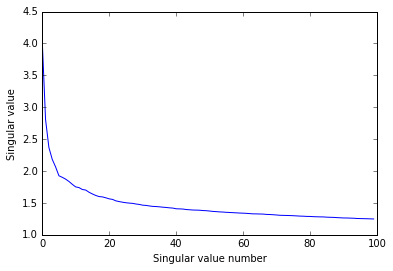

In [9]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [10]:
predictors_compressed, _, teas_compressed = svds(svd_matrix, k=20)
teas_compressed = teas_compressed.transpose()

print(predictors_compressed.shape)
print(teas_compressed.shape)

(876, 20)
(15641, 20)


### project dummy_matrix onto 2D

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(verbose=1)
print(teas_compressed.shape)
subset = teas_compressed[:5000, :]
projected_teas = tsne.fit_transform(subset)
print(projected_teas.shape)

(15641, 20)
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.003661
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.386410
[t-SNE] Error after 325 iterations: 1.386410
(5000, 2)


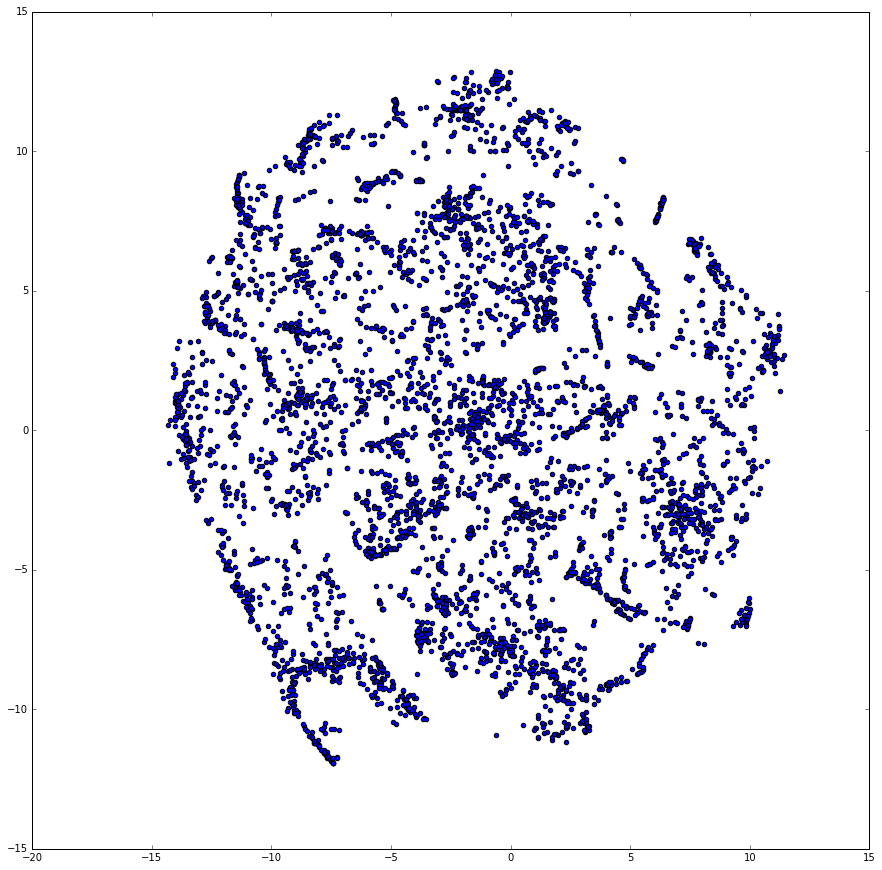

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(projected_teas[:,0],projected_teas[:,1])
plt.show()

## Clustering

In [14]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], 'o',
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('on')
    plt.tight_layout()

In [15]:
# 2D embedding of the digits dataset
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=12)
clustering.fit(projected_teas)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=12,
            pooling_func=<function mean at 0x7f057aaa92a8>)

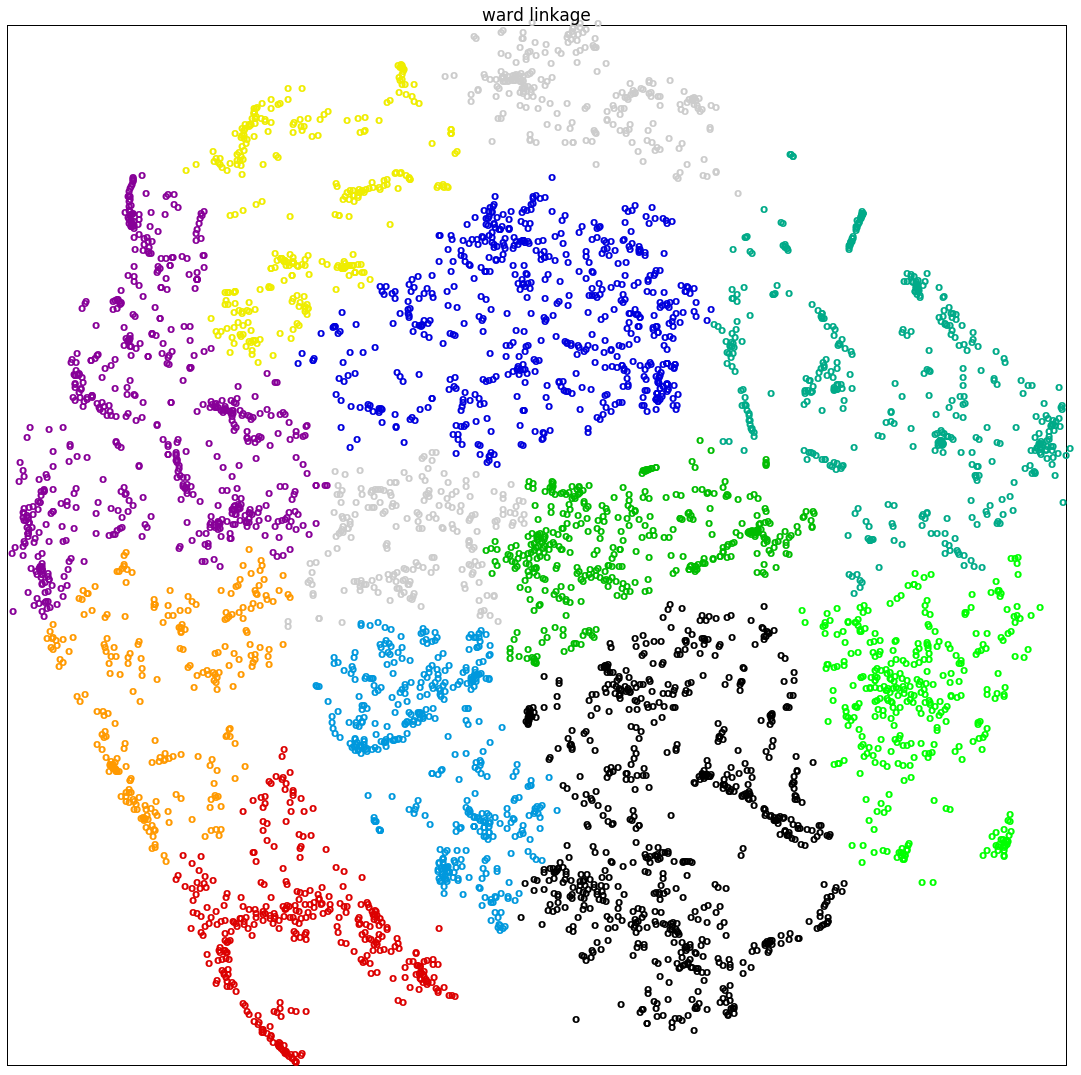

In [16]:
plot_clustering(projected_teas, clustering.labels_, "ward linkage")
plt.show()

## Use Silhouette Score to decide number of clusters

In [18]:
from sklearn.metrics import silhouette_score

range_n_clusters = [12,]     # clusters range you want to select
dataToFit = teas_compressed             # sample data, shape(15641, 20)
best_clusters = 0                       # best cluster number which you will get
previous_silh_avg = 0.0

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(dataToFit)
    silhouette_avg = silhouette_score(dataToFit, cluster_labels)
    if silhouette_avg > previous_silh_avg:
        previous_silh_avg = silhouette_avg
        best_clusters = n_clusters

In [ ]:
# Final Kmeans for best_clusters
HAC = AgglomerativeClustering(linkage='ward', n_clusters=best_clusters).fit(dataToFit)

In [39]:
def HAC_clustering(tea_df_dummy, dataframe, n_clusters):
    '''
    We use kmeans clustering to classify similar teas, 
    each tea has a label showing which cluster this tea belongs to.
    params:
    dataframe: pd.DataFrame, tea dataframe encoded using dummy variables 
                (without name, id...)
    n_clusters: int, number of clusters to be classified into
    id_: pd.Series, id of all teas
    
    return:
    A pd.DataFrame with three features of all teas: 'id', 'label' and 'recommendation'.
    'recommendation' is calculated using the sum of normalized value of four features:
    'reviewCount','ratingValue','ownIt', 'wantIt'
    
    '''
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import scale
    np.random.seed(42)
    data = scale(tea_df_dummy)
    HAC = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters).fit(data)
    labels = pd.Series(HAC.labels_)
    df_scores = dataframe[['reviewCount','ratingValue','ownIt', 'wantIt']]
    df_recommendation = ((df_scores-df_scores.mean())/df_scores.std()).sum(axis=1)
    df = pd.concat([dataframe.id, labels, df_recommendation], axis = 1)
    df.columns = ['id', 'label','recommendation']
    return df

In [40]:
id_label_df = kmeans_clustering(tea_df_dummy, 5, tea_df.id)

In [41]:
id_label_df.head()

,id,label,recommendation
0,65303,1,6.927074
1,43095,1,43.105925
2,78801,2,1.773889
3,48058,1,29.738652
4,32444,1,3.595841


In [42]:
def query_tea_with_same_label(q_id, id_label_df, top_n):
    '''
    This function takes a query of tea Id 
    and return a list of (id, recommendation_score) pairs sorted by 
    recommendation scores
    
    params:
    q_id: integer, the id of the tea which you want to find teas similar with
    id_label_df: pd.DataFrame, a dataframe having
                 id, label and recommendation scores of all teas
    top_n: integer, return top n results
    
    return:
    list: a list of (id, recommendation_score) pairs which has the same label as q_id 
            and sorted by their recommendation score
    '''
    q_label = int(id_label_df.label[id_label_df.id == q_id])
    tmp_df = id_label_df[['id','recommendation']][id_label_df.label == q_label].\
        sort_values('recommendation', ascending = False)
    return zip(tmp_df['id'].values, tmp_df['recommendation'].values)[:top_n]

In [43]:
res_id = query_tea_with_same_label(79043, id_label_df)

TypeError: query_tea_with_same_label() takes exactly 3 arguments (2 given)

In [ ]:
res_id[:10]